# Домашнее задание

Задание 1 [5 баллов]. Дана функция $f(x) = C * exp(cos(x))*sin(x)$ на интервале $I\{x \in [0, \pi] = [a, b]\}$.
При этом $f(x) = 0$ вне указанного интервала

1. Определите значение константы C, при которой данная функция является плотностью распределения.
2. Изобразите графически функцию плотности.
3. Рассчитайте формулу для функции распределения и изобразите её графически.
4. Рассчитайте значение математического ожидания (подсказка - может помочь scipy.integrate)
5. Проверьте центральную предельную теорему для данного распределения.

Проинтегрировав функцию $f(x)$ на интервале $[0, \pi]$ (т.к. вне интервала $f(x)=0$), получаем $C(e-\frac{1}{e})$.

Из условия нормировки, $C(e-\frac{1}{e}) = 1$. Отсюда,

$C = \frac{e}{e^2-1}$

$f(x) = \frac{e}{e^2-1} * exp(cos(x))*sin(x)$

In [30]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy import stats

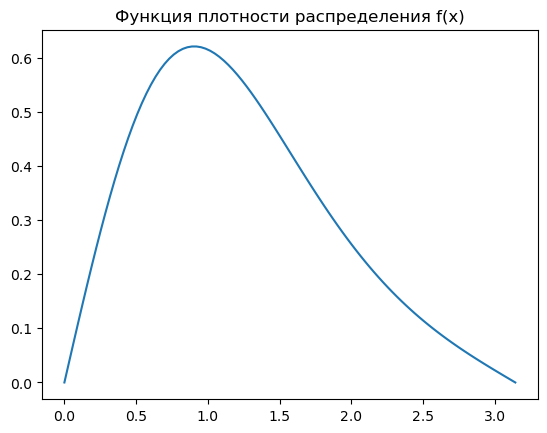

In [7]:
f = lambda x: np.e / (np.e**2-1)*np.exp(np.cos(x))*np.sin(x)
plt.plot(np.linspace(0, np.pi, 100), f(np.linspace(0, np.pi, 100)));
plt.title('Функция плотности распределения f(x)');

Интеграл функции распределения $f(x)$ на отрезке $[0, \pi]$:

$F(x) = -\frac{e}{e^2-1} e^{cos(x)} - (-\frac{e}{e^2-1} e^{cos(0)}) = \frac{e}{e^2-1}\left(e - e^{cos(x)} \right)$

Также, $F(x) = 0$ если $x \le 0$, и $F(x)=1$ если $x > \pi$

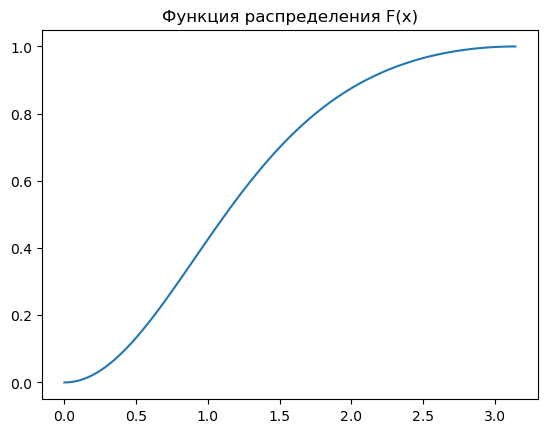

In [10]:
F = lambda x: np.e / (np.e**2-1) * (np.e - np.e**(np.cos(x)))
plt.plot(np.linspace(0, np.pi, 100), F(np.linspace(0, np.pi, 100)));
plt.title('Функция распределения F(x)');

In [19]:
E = integrate.quad(lambda x: x*f(x), 0, np.pi)[0]
E

1.2005331197658555

Рассмотрим н.о.р.с.в. $X_i$, i=1..n с функцией распределения $F(x)$, полученной ранее, и математическим ожиданием $E$, дисперсией $\sigma^2$. Также, рассмотрим $\bar{X_n} = \displaystyle \frac{1}{n} \sum_{i=1}^{n} X_i$

Согласно ЦПТ, $\sqrt{n} \dfrac{\bar{X_n} - E}{\sigma} \rightarrow N(0,1)$, где $N(0,1)$ - нормальное распределение с мат. ожиданием 0 и дисперсией 1.

Для проверки ЦПТ также понадибится расчитать дисперсию случайной величины $X$.

$\sigma^2 = \int_{0}^{\pi} (x-E)^2 f(x) dx$ (далее численно)

In [21]:
class f_gen(sps.rv_continuous):
    def _pdf(self, x):
        return f(x)
custom = f_gen(a=0, b=np.pi, name='custom')

In [26]:
custom.rvs(size=1000).shape

(1000,)

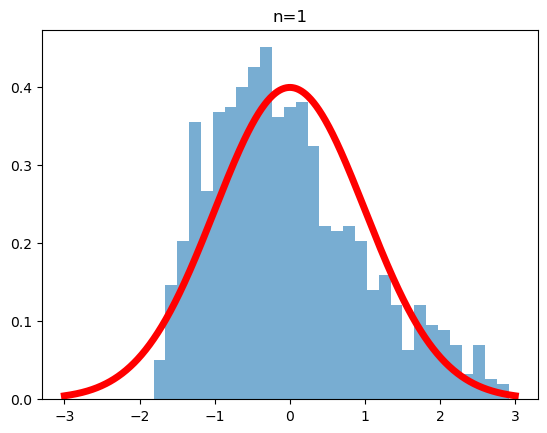

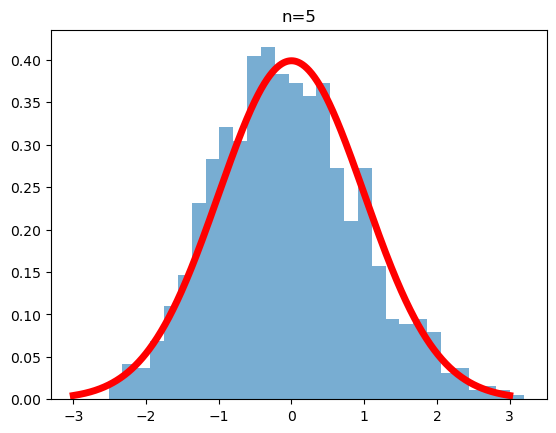

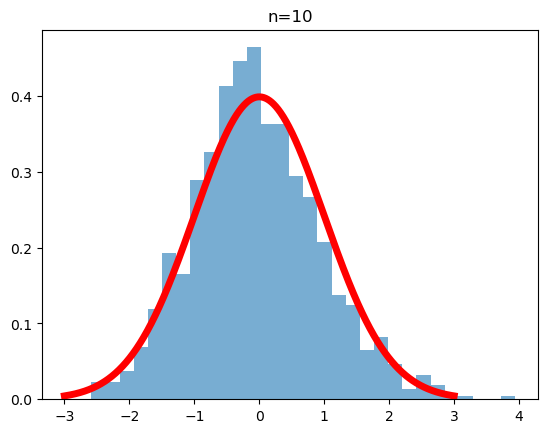

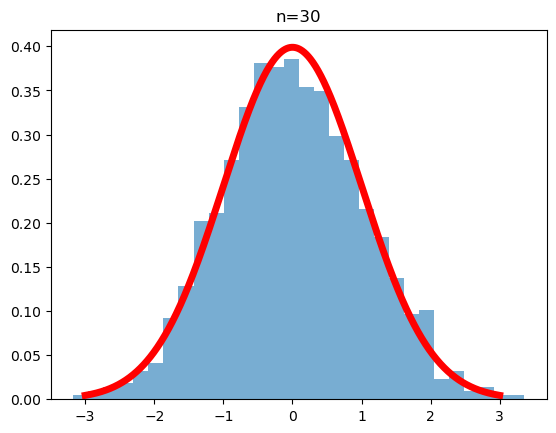

In [28]:
sigma = np.sqrt(integrate.quad(lambda x: ((x-E)**2)*f(x), 0, np.pi)[0])
xs = np.linspace(-3, 3, 1000)

for n in [1, 5, 10, 30]:
    sample = np.sqrt(n)*(np.array([custom.rvs(size=1000) for _ in range(n)]).mean(axis=0)-E)/sigma
    plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
    plt.plot(xs, sps.norm.pdf(xs), color='red', 
         lw=5, label='Плотность случайной величины') 
    plt.title(f"n={n}")
    plt.show()

Задание 2 [5 баллов]. Сгенерируйте 3 выборки из 3 различных распределений размерностью 1000, 50 000, 750 000

1. Рассчитайте основные статистические показатели для каждой из выборок и сравните их с теоретическими показателями выбранных вами распределений. Должны быть посчитаны:
- среднее
- дисперсия
2. Проверьте критерий Колмогорова для 3 выборок.
3. Для каждой пары выборок (всего будет 3) проверьте критерий Манна-Уитни.

1. Распределение хи-квадрат $\chi^2(k), E = k, D = 2k$
2. Экспоненциальное распределение $Exp(\lambda), E = \lambda^{-1}, D = \lambda^{-2}$
3. Распределение Стьюдента $t(k), E = 0$, если $k>1, D = \frac{k}{k-2}$, если $k>2$

In [51]:
k=10
print(f"Распределение хи-квадрат. k={k}, E={k}, D={2*k}")
ns = [1000, 50000, 750000]
for n in ns:
    sample = stats.chi2.rvs(df=k, size=n)
    print(f"n={n}, E={sample.mean()}, D={sample.var()}")
print(f"Критерий Колмогорова: {stats.kstest(stats.chi2.rvs(df=k, size=750000), lambda x: stats.chi2.cdf(x, df=k))}")

Распределение хи-квадрат. k=10, E=10, D=20
n=1000, E=10.089953137047154, D=19.899256193141248
n=50000, E=10.020428021594382, D=20.09370964793261
n=750000, E=9.999779073022262, D=19.968488065240454
Критерий Колмогорова: KstestResult(statistic=0.00097665157447957, pvalue=0.4714199734380756, statistic_location=8.105280211367605, statistic_sign=1)


In [52]:
l=10
print(f"Распределение хи-квадрат. lambda={l}, E={1/l}, D={1/(l**2)}")
ns = [1000, 50000, 750000]
for n in ns:
    sample = stats.expon.rvs(scale=1/l, size=n)
    print(f"n={n}, E={sample.mean()}, D={sample.var()}")
print(f"Критерий Колмогорова: {stats.kstest(stats.expon.rvs(scale=1/l, size=750000), lambda x: stats.expon.cdf(x, scale=1/l))}")

Распределение хи-квадрат. lambda=10, E=0.1, D=0.01
n=1000, E=0.09931517415442633, D=0.009385546516041373
n=50000, E=0.10080080853699837, D=0.01005944413158899
n=750000, E=0.0999956400188534, D=0.009979982844334535
Критерий Колмогорова: KstestResult(statistic=0.0009909751133264644, pvalue=0.452645193412442, statistic_location=0.08478760805664823, statistic_sign=-1)


In [53]:
k=10
print(f"Распределение хи-квадрат. k={k}, E={0}, D={k/(k-2)}")
ns = [1000, 50000, 750000]
for n in ns:
    sample = stats.t.rvs(df=k, size=n)
    print(f"n={n}, E={sample.mean()}, D={sample.var()}")
print(f"Критерий Колмогорова: {stats.kstest(stats.t.rvs(df=k, size=750000), lambda x: stats.t.cdf(x, df=k))}")

Распределение хи-квадрат. k=10, E=0, D=1.25
n=1000, E=-0.021661312486955162, D=1.2434343824781675
n=50000, E=-0.0064962886504854375, D=1.2292735497821832
n=750000, E=-0.0019900034974535533, D=1.2517764154754982
Критерий Колмогорова: KstestResult(statistic=0.000708382832060428, pvalue=0.8456813059817112, statistic_location=1.052970019661282, statistic_sign=-1)


Как и ожидалось, при увеличении выборки выборочные статистики становятся ближе к теоретическим. Также, критерий Колмогорова, при сравнении выборки и распределения, из которого она получена, даёт достаточно большое значение p-value, чтобы нельзя было отвергнуть нулевую гипотезу, о том, что выборка получена из этого распределения

Критерий Манна-Уитни

In [54]:
chi2 = stats.chi2.rvs(df=10, size=750000)
expon = stats.expon.rvs(scale=1/10, size=750000)
t = stats.t.rvs(df=10, size=750000)

print(f"Chi2 and expon: {stats.mannwhitneyu(chi2, expon)}")
print(f"Chi2 and t: {stats.mannwhitneyu(chi2, t)}")
print(f"Expon and t: {stats.mannwhitneyu(expon, t)}")

Chi2 and expon: MannwhitneyuResult(statistic=562499887426.0, pvalue=0.0)
Chi2 and t: MannwhitneyuResult(statistic=562134177540.0, pvalue=0.0)
Expon and t: MannwhitneyuResult(statistic=303269554987.0, pvalue=0.0)


Результаты получились вполне ожидаемыми: выборки, полученные из разных распределений, получают низкое значение p-value в критерии Манна-Уитни, который проверяет гипотезу, что их распределения одинаковы